In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [128]:
tspd = pd.read_csv('tesla_stock_data_2000_2025.csv')

In [129]:
tspd.shape

(3694, 6)

In [130]:
tspd.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000


In [131]:
tspd.columns

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [132]:
tspd.columns= ['Date','Close','High','Low','Open','Volume'] #df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

In [133]:
tspd.head()

,Date,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000


In [134]:
tspd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3694 non-null   object
 1   Close   3693 non-null   object
 2   High    3693 non-null   object
 3   Low     3693 non-null   object
 4   Open    3693 non-null   object
 5   Volume  3693 non-null   object
dtypes: object(6)
memory usage: 173.3+ KB


In [135]:
tspd.describe()

,Date,Close,High,Low,Open,Volume
count,3694,3693,3693,3693,3693,3693
unique,3694,3487,3376,3392,3377,3662
top,Ticker,1.8279999494552612,1.8666670322418213,1.8200000524520874,2.0,48294000
freq,1,4,7,6,6,2


In [136]:
tspd.isnull().sum()

Date      0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

In [137]:
tspd = tspd.iloc[2:]
tspd

,Date,Close,High,Low,Open,Volume
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000
5,2010-07-02,1.2799999713897705,1.5399999618530273,1.24733304977417,1.5333329439163208,77097000
6,2010-07-06,1.0740000009536743,1.3333330154418945,1.0553330183029175,1.3333330154418945,103003500
...,...,...,...,...,...,...
3689,2025-02-25,302.79998779296875,328.8900146484375,297.25,327.0199890136719,134228800
3690,2025-02-26,290.79998779296875,309.0,288.0400085449219,303.7099914550781,100118300
3691,2025-02-27,281.95001220703125,297.2300109863281,280.8800048828125,291.1600036621094,101748200
3692,2025-02-28,292.9800109863281,293.8800048828125,273.6000061035156,279.5,115397200


In [138]:
tspd[['Close','High','Low','Open']]=tspd[['Close','High','Low','Open']].astype(float)

In [139]:
tspd[['Volume']] = tspd[['Volume']].astype(int)

In [140]:
tspd["Date"]=pd.to_datetime(tspd["Date"])

In [141]:
tspd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692 entries, 2 to 3693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3692 non-null   datetime64[ns]
 1   Close   3692 non-null   float64       
 2   High    3692 non-null   float64       
 3   Low     3692 non-null   float64       
 4   Open    3692 non-null   float64       
 5   Volume  3692 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 158.8 KB


In [142]:
tspd.head()

,Date,Close,High,Low,Open,Volume
2,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
3,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
4,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
5,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
6,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [143]:
tspd = tspd.reset_index(drop=True)
tspd

,Date,Close,High,Low,Open,Volume
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...
3687,2025-02-25,302.799988,328.890015,297.250000,327.019989,134228800
3688,2025-02-26,290.799988,309.000000,288.040009,303.709991,100118300
3689,2025-02-27,281.950012,297.230011,280.880005,291.160004,101748200
3690,2025-02-28,292.980011,293.880005,273.600006,279.500000,115397200


In [144]:
tspd.describe()

,Date,Close,High,Low,Open,Volume
count,3692,3692.000000,3692.000000,3692.000000,3692.000000,3.692000e+03
mean,2017-10-27 10:56:48.884073728,84.684063,86.583019,82.720395,84.724803,9.647972e+07
min,2010-06-29 00:00:00,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,2014-02-27 18:00:00,12.226501,12.447833,12.011500,12.238833,4.938900e+07
50%,2017-10-25 12:00:00,18.326334,18.641334,17.938334,18.325000,8.192955e+07
75%,2021-06-28 06:00:00,182.869999,186.305000,178.772499,182.982506,1.216402e+08
max,2025-03-03 00:00:00,479.859985,488.540009,457.510010,475.899994,9.140820e+08
std,NaN,111.289879,113.897252,108.647448,111.413059,7.736170e+07


In [145]:
tspd.set_index("Date",inplace=True)

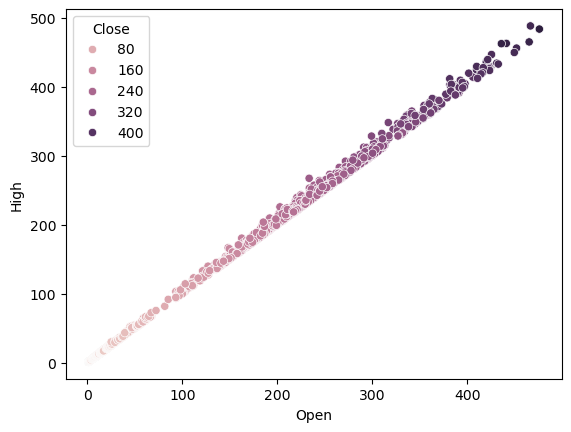

In [147]:
sns.scatterplot(x='Open',y='High',data=tspd,hue='Close')
plt.show()

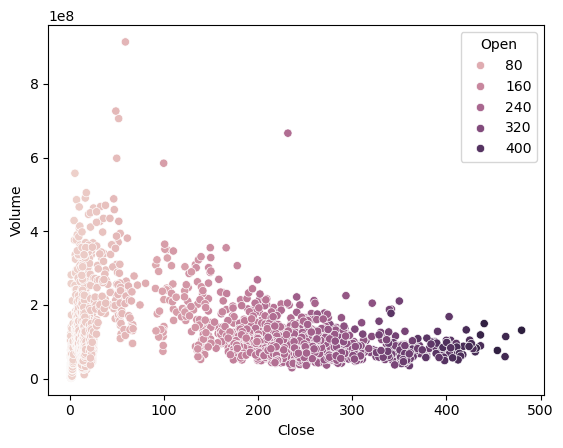

In [158]:
sns.scatterplot(x='Close',y='Volume',data=tspd,hue='Open')
plt.show()

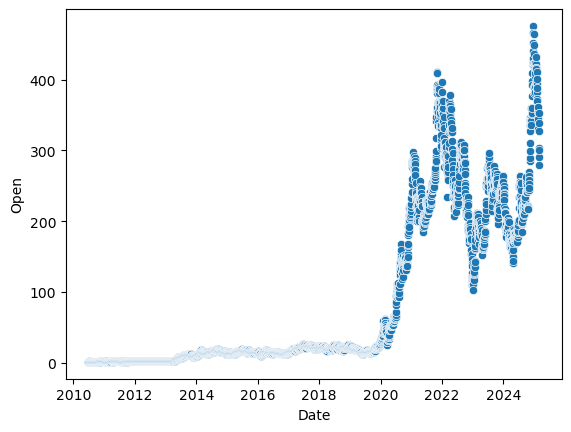

In [148]:
sns.scatterplot(x='Date',y='Open',data=tspd)
plt.show()

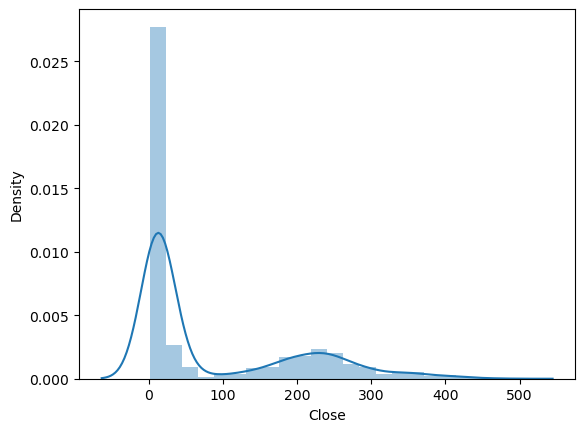

In [149]:
sns.distplot(tspd['Close'])
plt.show()

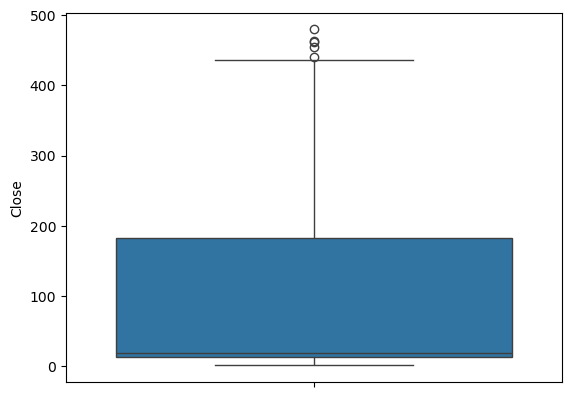

In [150]:
sns.boxplot(tspd['Close'])
plt.show()

In [151]:
tspd['Close'].skew()

1.180822365302528

In [152]:
corr = tspd.corr()
corr

,Close,High,Low,Open,Volume
Close,1.000000,0.999643,0.999690,0.999214,0.083805
High,0.999643,1.000000,0.999638,0.999721,0.086383
Low,0.999690,0.999638,1.000000,0.999624,0.079746
Open,0.999214,0.999721,0.999624,1.000000,0.082815
Volume,0.083805,0.086383,0.079746,0.082815,1.000000


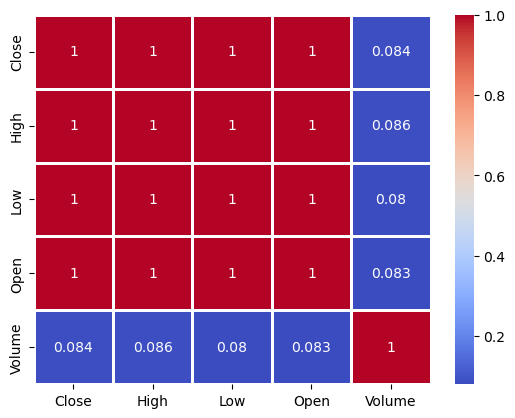

In [176]:
sns.heatmap(corr,annot=True,cmap='coolwarm',linecolor='white',linewidths=1)
plt.show()

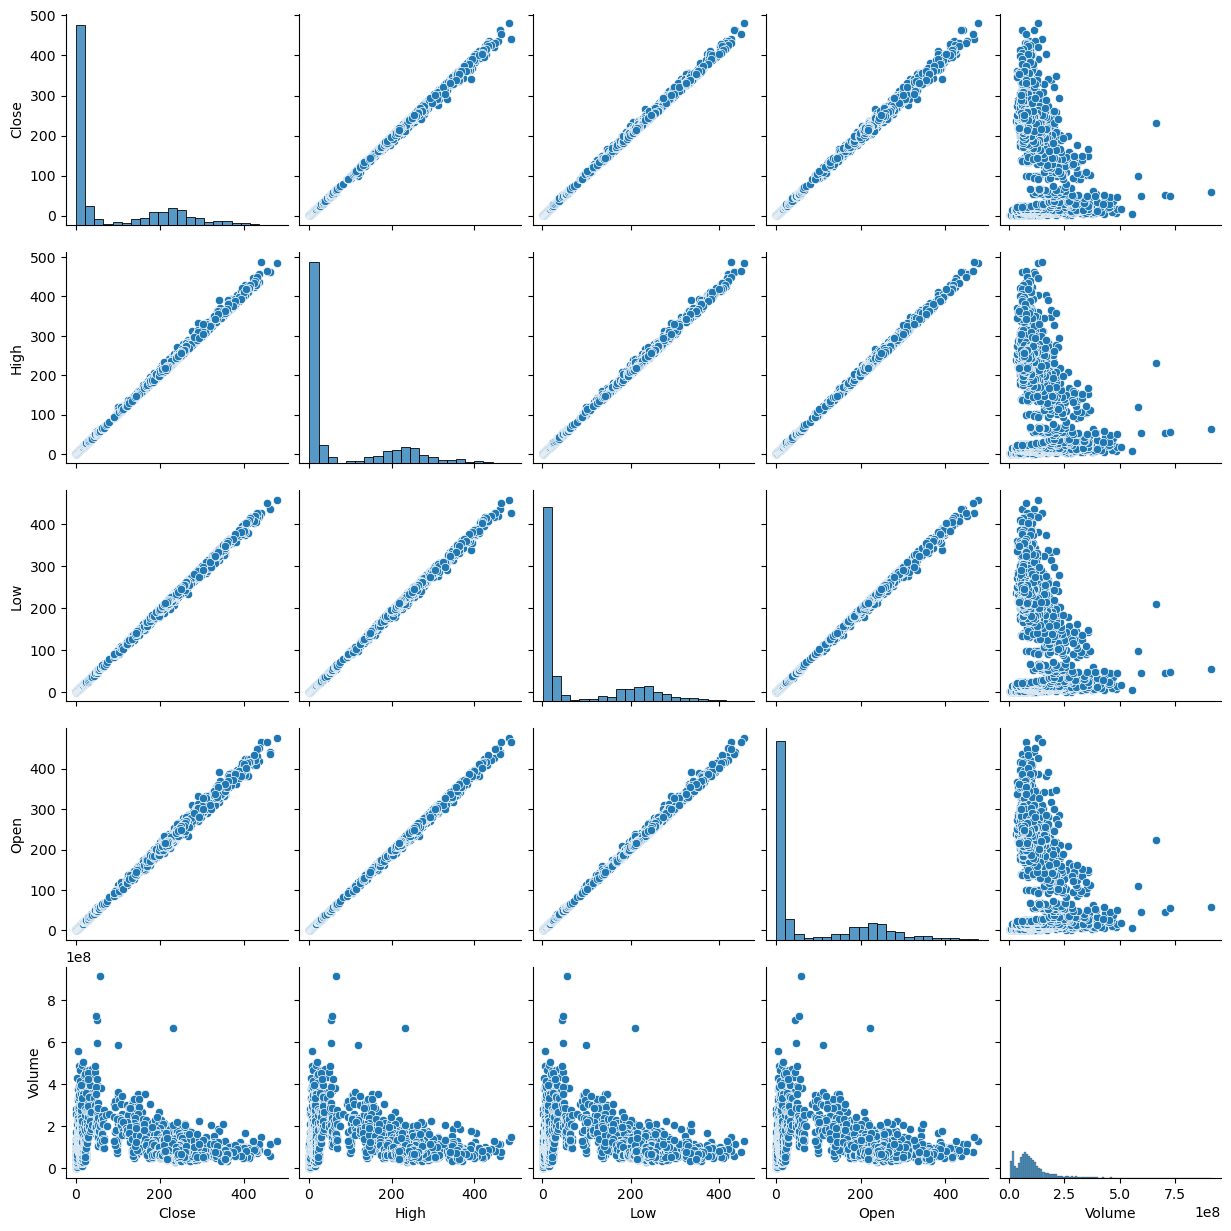

In [177]:
sns.pairplot(tspd)
plt.show()